In [99]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [100]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [101]:
len(cancer['feature_names'])

30

In [102]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()
    

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [103]:
class_distrubution = pd.Series([212,357],name='target',index=['malignant','benign'])
class_distrubution

malignant    212
benign       357
Name: target, dtype: int64

In [104]:
y = df.pop('target')
X = df

In [105]:
print(X,y).head()

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.65,random_state=0)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [143]:
knn.score(X_test,y_test)

0.93

In [144]:
means = df.mean()[:-1].values.reshape(1, -1)

In [145]:
prediction = knn.predict(X_test)

<IPython.core.display.Javascript object>


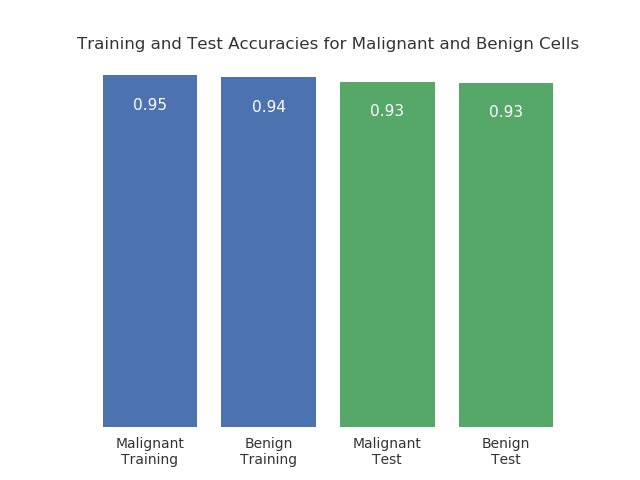

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [146]:
import matplotlib.pyplot as plt

mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

    

scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
          knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

plt.figure()

        
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

        
for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
        ha='center', color='w', fontsize=11)

    
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

accuracy_plot()